<table style="width:100%">
  <tr>
    <th align="right"><img src="img/dilogo.png" style="float:left;height:90px"></th>
    <th align="center">
    <h1 align="center">Laboratorio 3</h1>
    <h2 align="center">Profesor: Ricardo Ñanculef</h2>
    <h3 align="center">Ayudante: Gabriel Ortega</h3>
    <h3 align="center">Bernabé García; 201773621-6</h3>
    <h3 align="center">Rodrigo Cayazaya; 201773538-4</h3>
    <h3 align="center">Diciembre de 2019</h3>
    </th> 
    <th align="left"><img src="img/usmlogo.png" style="float:right;height:85px"></th>
  </tr>

## Instrucciones

La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual y ser entregado el 31 de diciembre de 2019.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab3.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas, un README que indique la forma correcta de ejecutar su notebook y cualquier archivo/carpeta extra que considere necesario para el correcto funcionamiento de su tarea. El laboratorio puede ser trabajado tanto en lenguaje R como en python 3 (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.

**Cualquier copia detectada implicará nota 0 en el laboratorio correspondiente y se notificará la situación al profesor.**




## 1. Ley de Zipf y NLP (30p)


#### Zipf

La ley de Zipf corresponde a una ley empírica elaborada por George Kingsley Zipf, lingüista americano. Esta ley dice que la distribución de palabras en un texto es de libre escala. Este fenómeno se evidenció en el idioma inglés y, después, se expandió a todos los otros idiomas. Su popularidad es tal, que se tiende a asociar a Zipf con leyes de potencia más allá del ámbito lingüista, se habla de comportamiento "zipfiano".

Para trabajar con esta ley es necesario analizar texto/s de gran extensión, formalmente conocidos como corpus. En este caso, trabajarán con una selección de libros en formatos .txt [disponibles aqui](https://www.gutenberg.org/browse/scores/top). No es necesario que los descargue todos, mínimo 3, máximo una cantidad que su computador pueda procesar en un tiempo decente para usted.

> a) Con los libros que usted seleccionó haga un gráfico en el que se muestren las 10 palabras de mayor frecuencia. ¿Qué puede decir acerca de las palabras que aparecen? 

> b) Del universo de palabras que puede construir mediante el análisis de texto ¿Cuál es la probabilidad de que, al elegir al azar una de ellas, obtenga una palabra rara? **Palabra rara:** su frecuencia de aparición es 1.

> c) ¿Se podría establecer alguna relación entre la probabilidad de encontrar $N$ palabras raras (su frecuencia de aparición es 1) en función del largo del texto analizado? ¿Hay alguna relación con b)? Fundamente. Pruebe para 3-5 valores distintos de $N$.

*Hint: podría ir leyendo por partes y cada vez seleccionando partes de mayor o menor largo.*

Para clasificar un texto (asignarles palabras o temas claves) se necesitan utilizar palabras características. Utilizando la ley de zipf se tiene que los extremos de la distribución no son útiles. Las palabras más comunes estarían presentes en casi todos los textos y las menos frecuentes no estarían en ninguno.

> d) En base a lo anterior seleccione 2 palabras que usted utilizaría para clasificar los textos analizados (el conjunto entero). Para las dos palabras $(w_1,w_2)$ seleccionadas se plantea la siguiente pregunta ¿La ocurrencia de $w_1$ en un texto es independiente de la presencia de $w_2$ en el mismo texto?. Debido que la cantidad de libros podría no ser suficiente para mostrar esto, es posible considerar sub-secciones como "mismo texto", por ejemplo, los capítulos. 

* Usted debe hacer la partición útil de la distribución según su criterio. No use stopwords para $w_1,w_2$ (¿No sabe lo que es una stopword? [Pinche aqui](https://www.google.com/)). Los extremos no sirven así que deberá buscar en otra parte.
* Explique el prodecimiento que realizará para mostrar la independencia o no independencia de las palabras.

----

Es muy posible que su corpus no pueda ser adjuntado junto a su laboratorio. Debido a esto, debe referenciar el sitio de donde descargó su corpus en el README.

## Pregunta A)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import codecs
import operator

In [29]:
libro1=codecs.open("The Adventures of Sherlock Holmes by Arthur Conan Doyle (392).txt", "r","utf8")
libro2=codecs.open("The Adventures of Tom Sawyer by Mark Twain (231).txt", "r","utf8")
libro3=codecs.open("The Strange Case of Dr. Jekyll and Mr. Hyde by Robert Louis Stevenson (381).txt", "r","utf8")
libro4=codecs.open("Adventures of Huckleberry Finn by Mark Twain (442).txt","r","utf8")
libro5=codecs.open("A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens (2294).txt","r","utf8")
libro6=codecs.open("Little Women by Louisa May Alcott (548).txt","r","utf8")
palabras=dict()
total=0
def LecturaFrecuencia(libro):
    global total
    for linea in libro.readlines():
        if(linea.split()!=[]):
            for palabra in linea.split():
                palabra=palabra.upper()
                total=total+1
                if(palabra in palabras.keys()):
                    palabras[palabra]=palabras[palabra]+1
                else:
                    palabras[palabra]=1

LecturaFrecuencia(libro1)
LecturaFrecuencia(libro2)
LecturaFrecuencia(libro3)
LecturaFrecuencia(libro4)
LecturaFrecuencia(libro5)
LecturaFrecuencia(libro6)
#Aca se separan las palabras y se realiza el conteo de la frecuencia en cada libro.
libro1.close()
libro2.close()
libro3.close()
libro4.close()
libro5.close()
libro6.close()    

In [30]:
final = sorted(palabras.items(), key=operator.itemgetter(1))
final.reverse()
palabra=[]
cantidad=[]
i=0
for tupla in final:
    palabra.append(tupla[0])
    cantidad.append(tupla[1])
    if i==9:
        break
    i+=1
#Orden y separacion de las etiquetas

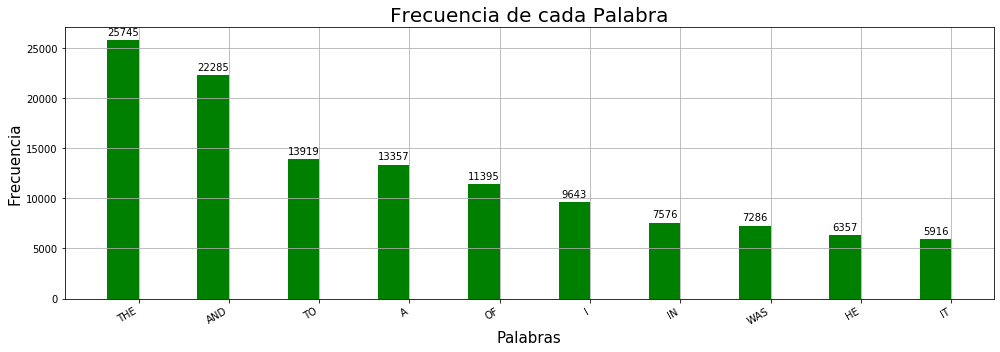

In [31]:
rango = np.arange(len(palabra)) 
width = 0.35

fig, ax = plt.subplots(figsize=(14, 5))
grafico = ax.bar(rango - width/2, cantidad, width,color='green')
ax.set_ylabel('Frecuencia',fontsize=15,color='k')
ax.set_xlabel('Palabras',fontsize=15,color='k')
ax.set_title('Frecuencia de cada Palabra',fontsize=20,color='k')
plt.grid()
fig.autofmt_xdate()
ax.set_xticks(rango)
ax.set_xticklabels(palabra)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(grafico)
fig.tight_layout()
plt.show()

### Son palabras que no superan las 3 letras, ademas se usan regularmente para unir oraciones, presentar sustantivos u oraciones.

## Pregunta B)

In [32]:
posible=0
for palabra in palabras:
    if(palabras[palabra]==1):
        posible=posible+1
probabilidad1=(posible/total)*100

In [33]:
print("Dentro de un universo de", total, "La probabilidad de obtener una palabra de frecuencia 1 en el total de palabras es",probabilidad1,"%")

Dentro de un universo de 544957 La probabilidad de obtener una palabra de frecuencia 1 en el total de palabras es 4.666790223815824 %


## Pregunta C)

In [34]:
libro1=codecs.open("The Adventures of Sherlock Holmes by Arthur Conan Doyle (392).txt", "r","utf8")
libro2=codecs.open("The Adventures of Tom Sawyer by Mark Twain (231).txt", "r","utf8")
libro3=codecs.open("The Strange Case of Dr. Jekyll and Mr. Hyde by Robert Louis Stevenson (381).txt", "r","utf8")
libro4=codecs.open("Adventures of Huckleberry Finn by Mark Twain (442).txt","r","utf8")
libro5=codecs.open("A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens (2294).txt","r","utf8")
palabras=dict()
total=0
#Para 2 Libros
LecturaFrecuencia(libro1)
LecturaFrecuencia(libro2)
posible=0
for palabra in palabras:
    if(palabras[palabra]==1):
        posible=posible+1
probabilidad2=(posible/total)*100
print("Dentro de un Universo de",total,"palabras, La probabilidad de obtener una palabra de Frecuencia 1 es:")
print(probabilidad2,"%")
#Para 3 Libros
LecturaFrecuencia(libro3)
posible=0
for palabra in palabras:
    if(palabras[palabra]==1):
        posible=posible+1
probabilidad3=(posible/total)*100
print("Dentro de un Universo de",total,"palabras, La probabilidad de obtener una palabra de Frecuencia 1 es:")
print(probabilidad3,"%")
#Para 4 Libros
LecturaFrecuencia(libro4)
posible=0
for palabra in palabras:
    if(palabras[palabra]==1):
        posible=posible+1
probabilidad4=(posible/total)*100
print("Dentro de un Universo de",total,"palabras, La probabilidad de obtener una palabra de Frecuencia 1 es:")
print(probabilidad4,"%")
#Para 5 Libros
LecturaFrecuencia(libro5)
posible=0
for palabra in palabras:
    if(palabras[palabra]==1):
        posible=posible+1
probabilidad5=(posible/total)*100
print("Dentro de un Universo de",total,"palabras, La probabilidad de obtener una palabra de Frecuencia 1 es:")
print(probabilidad5,"%")

Dentro de un Universo de 181443 palabras, La probabilidad de obtener una palabra de Frecuencia 1 es:
7.416103128806292 %
Dentro de un Universo de 210105 palabras, La probabilidad de obtener una palabra de Frecuencia 1 es:
7.016491754122939 %
Dentro de un Universo de 324310 palabras, La probabilidad de obtener una palabra de Frecuencia 1 es:
5.829915821282106 %
Dentro de un Universo de 355878 palabras, La probabilidad de obtener una palabra de Frecuencia 1 es:
5.744946301822535 %


### Se observa que mientras se aumente la cantidad de texto analizado, la probabilida de conseguir una palabra rara va en disminucion.

## 2. MCMC Decryption (40p)

La seguridad es un tema que desde tiempos inmemoriables ha sido utilizado en el envío de mensajes. Desde el *shift* de letras en $x$ posiciones hasta algoritmos complejos de encriptación que tienen a los computadores años intentando descifrarlos. Uno de los algoritmos utilizados para encriptar corresponde al de sustitución. Este algoritmo consiste en tener un hash con los pares (llave, valor) donde la letra que corresponde a la llave se reemplaza por la letra que corresponda a valor. Por ejemplo: 


```Python

Llave = "ITBLPHWZAREJXNFVOUDMCGYKQS"

Mensaje_Original = "Hola ¿qué tal?"

Mensaje_Encriptado = "ZFJI OCP MIJ"  #(notar que se ignoró puntuación y tilde)

Llave_Desencriptacion = "ICUSKOVFALXDTNQEYJZBRPGMWH"

```


#### ¿Cómo interpretar la llave? 

Dada una llave de la forma $x_{1}x_{2}x_{3}\dots x_{n}$ con $n$ largo del alfabeto inglés (A hasta Z sin Ñ)
la primera letra reemplazará a la "A", la segunda a "B", la tercera a "C" y así hasta la "Z". 

**Ejemplo pequeño:** 

"ABCD" lo encriptaré con la siguiente llave "CADB", la llave para desencriptar el mensaje es la siguiente "BDAC".

1. Encripto "CADA" con "CADB" $\rightarrow$ "DCBC"
2. Descencripto "DCBC" con "BDAC" $\rightarrow$ "CADA"

Esta será la nomenclatura que se utilizará al momento de presentar las llaves. 

#### Problema

A usted le han entregado un texto encriptado mediante sustitución, pero no conoce la llave que se utilizó originalmente para encriptarlo. Un enfoque fuerza bruta para descifrarlo implica que usted probará las $26!$ posibles combinaciones para desencriptar el texto. Claramente, probar semejante cantidad lo tendrá esperando una respuesta hasta mucho después de la fecha de entrega del laboratorio. 

Para resolver este problema se le plantea un método muy útil para resolver este problema en un tiempo mucho más prudente: cadenas de Markov con el método de Montecarlo (MCMC). El procedimiento es el siguiente: 

##### 1. Analizar Texto del idioma original

Es necesario tener una noción de la estructura del lenguaje origen del mensaje. Descifrar un mensaje en chino (5000 caractes que se utilizan en la vida diaria aprox) o descifrar un mensaje en inglés (26 letras solamente) no
utilizarán el mismo criterio para detectar estructura. 

En este caso trabajará con el idioma inglés y deberá buscar un texto en inglés bastante extenso (Corpus) o compilado de textos extensos para analizar las frecuencias. Para el idioma inglés se sugiere contar las frecuencias de a pares de caracteres, solamente utilice las 26 letras y el espacio " " para contar frecuencias.
Por ejemplo: "AH"," A", "A ", "BA", (el orden de aparición si importa en este caso). 

Recuerde que para los lenguajes de programación "a" y "A" no son lo mismo, pero para efectos del desencriptado sí.

#### 2. Métrica de Desempeño 

El método que se proponE consiste en probar llaves de desencriptación aleatorias. Si no se define una forma para comparar una propuesta de otra, se tendrá el mismo proceso que el de probar todas las posibilidades hasta achuntarle. Se creará una métrica de desempeño que asigne un puntaje a cierta llave para ir optando por llaves que tiendan a un mayor puntaje.

La métrica que se sugiere es:

$$
 Puntaje = \prod Frecs("Par")^{Ocurrencias("Par")}
$$

Donde "Frecs("Par")" corresponde a la frecuencia del par ("AH" por ejemplo) en el análisis de texto realizado en el paso 1 y "Ocurrencias("Par")" corresponde a la frecuencia de dicho par **en el texto desencriptado con la llave propuesta**. Para facilitar los cálculos es recomendable utilizar $log(Puntaje)$ como métrica final. La métrica sugerida es proporcional a la máxima verosimilitud.

#### 3. Decisiones 

Para decidir si nos quedaremos con la solución actual o la solución propuesta haremos lo siguiente: 

* Si el puntaje de la solución actual es menor que el de la solución propuesta, nuestra propuesta actual será actualizada por la solución propuesta para la siguiente iteración. 

* Si el puntaje de la solución actual es mayor que el de la solución propuesta, se tirará una moneda cuya probabilidad de **cara** sea $\frac{Score\,Propuesta}{Score\,Actual}$, si sale cara optaremos por la solución propuesta.

#### 4. Procedimiento 

1. Elegimos alguna llave para desencriptar inicial, la que se quiera.
2. La llave propuesta será una variación de la llave actual permutando 2 elementos de ésta. 
3. Se toman las decisiones como el punto "Decisiones" indica. 
4. Repetir 2 y 3 varias veces. Se recomienda iterar 10000 veces o mas.
5. Terminadas las iteraciones se retornar el texto desencriptado junto a la llave de desencriptación.

>**Importante:** Es posible que al desencriptar el mensaje su resultado final no parezca tener sentido aunque
tenga todo bien programado. Esto es debido al azar así que corra su algoritmo unas cuantas veces si el primer
resultado no parece tener sentido antes de corregir el código. (En mis intentos, por lo general unas 3-5 veces era suficiente si no funcionaba a la primera). 


* Los textos encriptados que se le han facilitado se encuentran en el archivo "cifrados.txt"
* Los textos 1, 2 y 3 fueron encriptados utilizando la misma llave.
* El texto 4 es el mismo mensaje del texto 1 pero encriptado con otra llave.
* El texto 2 fue escrito originalmente en español (se reemplazó Ñ por N para mantener el tamaño del alfabeto) y los textos 1, 3 y 4 en inglés.

>a) Analice la métrica de desempeño y explique lo que intenta lograr ¿Qué es lo que se premia? 

>b) Desencripte el texto 1 utilizando el método explicado. 

>c) Desencripte el texto 2 utilizando el método explicado y el **análisis de texto en inglés**. De lo que obtuvo ¿Qué puede decir acerca de desencriptar un lenguaje distinto del analizado? ¿Qué puede decir acerca de la estructura de ambos lenguajes?

>d) Desencripte el texto 3 utilizando el método explicado. *Hint: Texto 1*.

>e) Desencripte el texto 4 utilizando el método explicado. Compare con lo obtenido en b) ¿La llave que se utiliza para encriptar tiene importancia en el resultado?

>f) ¿A qué se debe que al correr varias veces su algoritmo se pueda obtener un mensaje entendible, pero con distintas llaves de desencriptación? ¿Qué puede decir acerca del método, es determinista o estocástico? 

>g) **Bonus +5** Plantee una estrategia para desencriptar el texto 2 que está en español. Obtendrá otros 5 puntos si logra desencriptarlo, pero recuerde que la Ñ se reemplazó por N.

---
Es posible que al descifrar le quede un mensaje con pequeños errores, por ejemplo, "HSTO NO CONCUHRDA", si este es su caso, puede intentar sacar el mensaje original haciendo estas correcciones a mano. 

---

## Pregunta A)

##### Lo que busca la metrica de desempeño es que no se produzca la busqueda aleatoria de la llave, lo que nos llevaria a usar 26! diferentes llaves, si no que se busque de forma mas guiada, dandole un puntaje a cada ocurrencia, de manera que estas ocurrencias sean elegidas sobre otras por medio de la frecuencia que ocurre cada una.

In [48]:
import math
import cmath
import re
import random
import string

In [49]:
prueba=codecs.open("Entrenamiento.txt", "r","utf-8-sig")
frecs=dict()
letras = list(string.ascii_uppercase)
for linea in prueba.readlines():
    i=0
    linea=linea.upper()
    linea=re.compile(r'\W+', re.UNICODE).split(linea)
    linea=" ".join(linea)
    while (i<len(linea)-1):
        letra1=linea[i]
        letra2=linea[i+1]
        if(letra1!=" " and letra1 not in letras):
            letra1=" "
        if(letra2!=" " and letra2 not in letras):
            letra2=" "
        else:
            par=letra1+letra2
            if(par in frecs.keys()):
                frecs[par]=frecs[par]+1
            else:
                frecs[par]=1
        i=i+1

In [50]:
archivo = open("cifrados.txt", 'r') #Guarda los textos en una lista de largo 4 [texto1, texto2, texto3, texto 4]
contador=1
for linea in archivo.readlines():
    i=0
    if(contador==2):
        contador=contador+1
        texto1=linea
        i=i+2
    elif(contador==5):
        texto2=linea
        i=i+2
        contador=contador+1
    elif(contador==8):
        texto3=linea
        i=i+2
        contador=contador+1
    elif(contador==11):
        texto4=linea
        i=i+2
        contador=contador+1
    else:
        contador=contador+1
archivo.close()
textos=[]
textos.append(texto1)
textos.append(texto2)
textos.append(texto3)
textos.append(texto4)

In [51]:
def actualizar (clave,diccionario): #Modifica el diccionario que Traduce
    original="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    original=list(original)
    i=0
    while i<26:
        diccionario[original[i]]=clave[i]
        i=i+1
    return diccionario

def traducir(texto): #Traduce el texto
    traducido=""
    for letra in texto:
        if(letra!=" " and letra!="\n"):
            traducido=traducido+traductor[letra]
        else:
            if(letra!="\n"):
                traducido=traducido+letra
    return traducido

def cambio(claveA): #Cambia la clave
    claveActual=claveA
    propuestos=random.sample(claveActual,2)
    indices=[claveActual.index(propuestos[0]),claveActual.index(propuestos[1])]
    if(indices[0]>indices[1]):
        claveActual.remove(propuestos[0])
        claveActual.insert(indices[0], propuestos[1])
        claveActual.remove(propuestos[1])
        claveActual.insert(indices[1], propuestos[0])
    else:
        claveActual.remove(propuestos[1])
        claveActual.insert(indices[1], propuestos[0])
        claveActual.remove(propuestos[0])
        claveActual.insert(indices[0], propuestos[1])
    return claveActual

def ocurrencias(texto): #Calcula las ocurrencias
    i=0
    resultado={}
    while (i<len(texto)-1):
        letra1=texto[i]
        letra2=texto[i+1]
        par=letra1+letra2
        if(par in resultado.keys()):
            resultado[par]=resultado[par]+1
        else:
            resultado[par]=1
        i=i+1
    return resultado

def calculoPuntaje(frecuencias, ocurrencia):
    final=0
    for par in ocurrencia.keys():
        if(par in frecuencias.keys()):
            numero=ocurrencia[par]*math.log(frecs[par],10)
            final=final+numero
    return final

def copiar(lista):
    resultado=[]
    for i in lista:
        resultado.append(i)
    return resultado



In [52]:
def desencriptador(textoA):
    clave="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    clave=list(clave)
    claveMaestra=list(clave)
    actualizar(clave, traductor)
    textoTraducido=traducir(textoA)
    ocurrenciasTexto=ocurrencias(textoTraducido)
    puntaje=calculoPuntaje(frecs, ocurrenciasTexto)
    aspirante=0
    i=0
    while i < 10000:
        clave=cambio(clave)
        actualizar(clave,traductor)
        textoTraducido=traducir(textoA)
        ocurrenciasTexto=ocurrencias(textoTraducido)
        aspirante=calculoPuntaje(frecs, ocurrenciasTexto)
        if(aspirante>=puntaje):
            puntaje=aspirante
            claveMaestra=copiar(clave)
        else:
            caraSello=random.random()
            if(caraSello<=min(1,math.exp(aspirante-puntaje))):
                puntaje=aspirante
                claveMaestra=copiar(clave)
            else:
                clave=copiar(claveMaestra)
        i=i+1
    actualizar(claveMaestra, traductor)
    print("El Texto desencriptado es el siguiente:")
    print()
    print("Clave Utilizada: ", claveMaestra)
    print()
    print("Texto Traducido:", traducir(textoA))
    print()
    clave="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    clave=list(clave)
    actualizar(clave,traductor)
    return claveMaestra

In [53]:
clave="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
clave=list(clave)
traductor={}
traductor=actualizar(clave, traductor)

## Pregunta B)

In [54]:
claveTexto1=desencriptador(textos[0])

El Texto desencriptado es el siguiente:

Clave Utilizada:  ['W', 'E', 'F', 'L', 'Y', 'B', 'N', 'D', 'S', 'Z', 'P', 'G', 'J', 'I', 'C', 'X', 'U', 'V', 'O', 'A', 'K', 'T', 'Q', 'H', 'M', 'R']

Texto Traducido: HELLO HOW ARE YOU I AM FINE THANK YOU I DISCOVERED THAT IF YOU USE A SHORTER TEXT IT WILL DIVERGE AND EVERYTHING WON T WORK YOU NEED TO USE LONGER ENCODED TEXT IN ORDER FOR YOU TO GET A TRUSTWORTHY ANSWER OF YOUR ALGORITHM  OTHERWISE YOU LL GET A LOT OF GIBBERISH AND FEEL LIKE IT DOES NOT WORK USE LONG TEXTS IF POSSIBLE WITH A VARIETY OF WORDS ALSO REMEMBER THAT IF THE MESSAGE CONTAINS DIGITS IT WILL BE A LOT HARDER TO DECYPHER BECAUSE THERE IS NO RULE AS HOW TO ORDER THE DIGITS OF A NUMBER THE POSSIBILITIES ARE INFINITE AND REMEMBER THAT THE DECIPHERED TEXT DOES NOT HAVE TO BE EQUAL TO THE ORIGINAL TEXT IF YOU DON THAVE THE ORIGINAL ENCRYPTION KEY YOU ANSWER WILL ALSO VARY IF THE ORIGINAL TEXT USES A WIDE VARIETY OF LETTERSOR NOT BECAUSE THIS AFFECTS THE OBJECTIVE FUNCTION YOU ARE

## Pregunta C)

In [55]:
actualizar(claveTexto1, traductor)
print(traducir(textos[1]))

claveTexto2=desencriptador(textos[1])

ESTE TEXTO ESTA ESCRITO EN ESPANOL  PARA NO ALTERAR EL ALGORITMO UTILIZARE N SIN GORRITO PARA TESTEAR EL ALGORITMO  TAMBIEN EVITARE USAR TILDES YA QUE SON CARACTERES ESPECIALES  AL DESCIFRAR ESTE MENSAJE PODRAN VER COMO EL ALGORITMO SE COMPORTA UTILIZANDO UNA FUNCION DISENADA PARA EL INGLES EN UN MENSAJE QUE FUE ESCRITO ORIGINALMENTE EN ESPANOL  COMO SE SUGIERE IGNORAR LA PUNTUACION SOLAMENTE BASTA CON ESCRIBIR LAS ORACIONES Y QUE QUEDE TODO DE MANERA CAVERNICOLA  PODRA EL ALGORITMO DESCIFRAR ESTE TEXTO
El Texto desencriptado es el siguiente:

Clave Utilizada:  ['Z', 'O', 'B', 'N', 'K', 'F', 'S', 'C', 'T', 'V', 'W', 'G', 'J', 'I', 'H', 'U', 'Y', 'P', 'A', 'E', 'Q', 'L', 'M', 'X', 'D', 'R']

Texto Traducido: OTLO LOULA OTLE OTHRILA OS OTWESAN  WERE SA ENLORER ON ENGARILDA YLINIVERO S TIS GARRILA WERE LOTLOER ON ENGARILDA  LEDFIOS OPILERO YTER LINCOT KE MYO TAS HEREHLOROT OTWOHIENOT  EN COTHIBRER OTLO DOSTEJO WACRES POR HADA ON ENGARILDA TO HADWARLE YLINIVESCA YSE BYSHIAS CITOSECE WERE O

## Pregunta D)

In [56]:
claveTexto3=desencriptador(textos[2])

El Texto desencriptado es el siguiente:

Clave Utilizada:  ['J', 'I', 'L', 'M', 'Y', 'Q', 'U', 'D', 'S', 'V', 'W', 'G', 'K', 'A', 'P', 'F', 'R', 'C', 'O', 'E', 'Z', 'T', 'X', 'H', 'B', 'N']

Texto Traducido: THAS AS E CINY SHONT IUGMASH TIFT POUGNETRMETAOUS YOR BEUEGID TO DIPAWHIN BI



## Pregunta E)

In [57]:
claveTexto4=desencriptador(textos[3])

El Texto desencriptado es el siguiente:

Clave Utilizada:  ['O', 'U', 'K', 'E', 'S', 'I', 'C', 'L', 'D', 'F', 'A', 'G', 'V', 'W', 'H', 'N', 'Y', 'P', 'T', 'B', 'J', 'M', 'R', 'Z', 'Q', 'X']

Texto Traducido: DESSO DOW ARE YOU I AM FINE LDANK YOU I HITCOVEREH LDAL IF YOU UTE A TDORLER LEPL IL WISS HIVERGE ANH EVERYLDING WON L WORK YOU NEEH LO UTE SONGER ENCOHEH LEPL IN ORHER FOR YOU LO GEL A LRUTLWORLDY ANTWER OF YOUR ASGORILDM  OLDERWITE YOU SS GEL A SOL OF GIBBERITD ANH FEES SIKE IL HOET NOL WORK UTE SONG LEPLT IF ZOTTIBSE WILD A VARIELY OF WORHT ASTO REMEMBER LDAL IF LDE METTAGE CONLAINT HIGILT IL WISS BE A SOL DARHER LO HECYZDER BECAUTE LDERE IT NO RUSE AT DOW LO ORHER LDE HIGILT OF A NUMBER LDE ZOTTIBISILIET ARE INFINILE ANH REMEMBER LDAL LDE HECIZDEREH LEPL HOET NOL DAVE LO BE EQUAS LO LDE ORIGINAS LEPL IF YOU HON LDAVE LDE ORIGINAS ENCRYZLION KEY YOU ANTWER WISS ASTO VARY IF LDE ORIGINAS LEPL UTET A WIHE VARIELY OF SELLERTOR NOL BECAUTE LDIT AFFECLT LDE OBJECLIVE FUNCLION YOU ARE

## 3. Regresión Lineal y Bootstrap (30p)

### Introducción a Método Bootstrap

Suponga que tiene una muestra  <b>M</b> de una población <b>P</b> y esta muestra <b>M</b> es de tamaño <b>N</b>. Queremos obtener algún estimador $ \theta $ de <b>P</b> a partir de <b>M</b> ya sea la media, varianza, o alguna otra función que interese, obviamente este estimador tendrá un error asociado ya que no es el estimador de la población. Uno de los métodos para determinar intervalos de confianza es el método bootstrap que permite trabajar solamente con una muestra de la población.

Podemos entender bootstrap de la siguiente manera: Suponga que tenemos en una bolsa papelitos con cada elemento de la muestra <b>M</b>, sacamos un papelito, <b>lo volvemos a guardar en la bolsa</b> y repetimos este proceso <b>N</b> veces hasta tener una muestra $M^{1*}$ y sobre esta muestra de la muestra aplicamos la función que queremos conocer (media, varianza, etc) teniendo un estimador $ \theta ^{1*} $ . Luego repetimos este proceso <b>B</b> veces y terminamos con un conjunto de <b>B</b> estimadores. 

Una forma de construir intervalos de confianza con el método bootstrap es utilizar los percentiles. Si queremos un intervalo de 90% de confianza, utilizamos un intervalo **simétrico** que vaya desde el percentil $X$ hasta el percentil $Y$ de manera que $Y-X = 0.90$. En el ejemplo anterior serían los percentiles 5% y 95%.

[Método Bootstrap](https://www.youtube.com/watch?v=ZCXg64l9R_4)

### El problema

Usted cuenta con un registro histórico del clima de Szeged, Hungría. Tiene datos comprendidos entre el 2006 y 2016, entre ellos están la temperatura (en °C), la humedad, velocidad del viento (Km/h) y la presión (milibar). Usted trabajará con las 4 columnas mencionadas e intentará encontrar alguna relación entre estas variables.

[Dataset aqui](https://www.kaggle.com/budincsevity/szeged-weather)

> a) Calcule la correlación entre los pares posibles de las 4 columnas mencionadas e indique entre cuáles de ellas hay relación y el tipo de relación.

> b) Construya un modelo de regresión lineal donde se utilice la temperatura para predecir la humedad, indique los valores del coeficiente de posición y la pendiente.

> c) Construya un intervalo de confianza del 95% para el coeficiente de posición, sin utilizar bootstrap. Construya el mismo intervalo con el método bootstrap utilizando tamaños $\frac{N}{2}$ y $N$ , ambos se deben realizar $2000$ veces. Compare los 3 intervalos y comente.

*Hint: Hay varios modelos involucrados*

> d) Un amigo suyo que había trabajado previamente con este conjunto de datos le dijo que no existía relación lineal entre la temperatura y la humedad. Usted decide verificar esto aplicando un test de hipótesis con un 95% de significancia. 

*Hint: Tiene que ver con la pendiente*

> e) Su amigo también le dijo que no existía una relación lineal entre la temperatura y la presión. Usted decide verificar esto aplicando un test de hipótesis con un 95% de significancia.

> f) Calcule el [mse](https://es.wikipedia.org/wiki/Error_cuadr%C3%A1tico_medio) del modelo obtenido en b). Se le ha propuesto la opción de realizar 3 modelos utilizando 3 intervalos de temperatura: 

* $\left(-\infty,0\right]$
* $ \left(0,20\right]$
* $\left(20,+\infty \right]$

Utilizando el método propuesto calcule el nuevo $ MSE^{*} = MSE_1 + MSE_2 + MSE_3$ y compárelo con el $MSE_b$ (el de b). ¿Es esta propuesta mejor o peor que la realizada con anterioridad?



## Pregunta A)

In [6]:
import pandas as pd
import random as rd

clima = pd.read_csv("weatherHistory.csv")
df = pd.DataFrame(clima)
df = df[['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']]

df.corr().replace(1,'-')

,Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Temperature (C),-,-0.632255,0.00895697,-0.00544711
Humidity,-0.632255,-,-0.224951,0.00545426
Wind Speed (km/h),0.00895697,-0.224951,-,-0.0492628
Pressure (millibars),-0.00544711,0.00545426,-0.0492628,-


#### Conclusión
nota: Que la correlación sea cercana al 0 no significa que no exista relación, solo que la relación no es lineal.


Se puede observar que la correlación entre A y B es igual que entre B y A, por lo que existen solo 6 correlaciones:

Temperatura/Humedad: Esta correlación es inversa y lineal.

Temperatura/Velocidad del Viento: Esta correlación es directa y no lineal.

Temperatura/Presión: Esta correlación es inversa y no lineal.

Humedad/Velocidad del Viento: Esta correlación es inversa y poco lineal.

Humedad/Presión: Esta correlación es directa y no lineal.

Velocidad del Viento/Presión: Esta correlación es inversa y no lineal.

## Pregunta B)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


x = df.iloc[:,0].values.reshape((-1,1))
y = df.iloc[:,1].values

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
error_medio = mean_squared_error(y, y_pred)

coeficiente_de_posicion = model.intercept_

print("Coeficiente de Posición = ",coeficiente_de_posicion)
print("Pendiente = ",model.coef_[0])

Coeficiente de Posición =  0.8892972609553129
Pendiente =  -0.012939114669679432


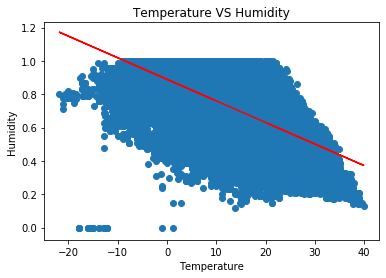

In [8]:
plt.scatter(x,y)
plt.plot(x,model.predict(x),color="red")

plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Temperature VS Humidity')

plt.show()

## Pregunta C)

#### SIN BOOTSTRAP

In [9]:
from scipy.stats import t
import math  

n = 100
v = n-2
alfa_medio = 0.025
muestra = df.sample(n=n, random_state=rd.randint(1,n))
s = error_medio
Sxx = muestra[['Temperature (C)']].var().values
Sxx = Sxx[0]*n
t_alfa_medio = -t.ppf(alfa_medio,v)

muestra['T^2'] = muestra['Temperature (C)']**2
raiz_suma_cuadrados = math.sqrt(muestra[['T^2']].sum().values[0])
suma_resta = (t_alfa_medio*s*raiz_suma_cuadrados)/math.sqrt(Sxx*n)
intervalo = [coeficiente_de_posicion - suma_resta, coeficiente_de_posicion + suma_resta]
print("EL INTERVALO ES:")
intervalo

EL INTERVALO ES:


[0.8821560198380375, 0.8964385020725884]

#### CON BOOTSTRAP

In [10]:
B = 2000
N = 30
N_medio = int(N/2)
Theta_n = []
Theta_n_medio = []

for j in range(B):
    M_prima_n = []
    M_prima_n_medio = []
    M_n = df.sample(n=N, random_state=rd.randint(1,N))
    M_n_medio = df.sample(n=N_medio, random_state=rd.randint(1,N_medio))
    for i in range(N):
        M_prima_n.append(M_n.sample(n=1,random_state=rd.randint(1,N)).values[0])
        if(i < N/2):
            M_prima_n_medio.append(M_n_medio.sample(n=1,random_state=rd.randint(1,N_medio)).values[0])
            
    M_prima_n_medio = pd.DataFrame(M_prima_n_medio)
    M_prima_n_medio.columns = ['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']
    
    M_prima_n = pd.DataFrame(M_prima_n)
    M_prima_n.columns = ['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']
    
    x_n_medio = M_prima_n_medio.iloc[:,0].values.reshape((-1,1))
    y_n_medio = M_prima_n_medio.iloc[:,1].values
    model_n_medio = LinearRegression()
    model_n_medio.fit(x_n_medio, y_n_medio)
    Theta_n_medio.append(model_n_medio.intercept_)
    
    x_n = M_prima_n.iloc[:,0].values.reshape((-1,1))
    y_n = M_prima_n.iloc[:,1].values
    model_n = LinearRegression()
    model_n.fit(x_n, y_n)
    Theta_n.append(model_n.intercept_)
    
Theta_n.sort()
Theta_n_medio.sort()


In [76]:
X_n = np.percentile(Theta_n,2.5)
Y_n = np.percentile(Theta_n,97.5)

X_n_medio = np.percentile(Theta_n_medio,2.5)
Y_n_medio = np.percentile(Theta_n_medio,97.5)


print("EL INTERVALO PARA N/2 ES:")
inter_n_medio = [X_n_medio,Y_n_medio]
print(inter_n_medio)

print()

print("EL INTERVALO PARA N ES:")
inter_n = [X_n,Y_n]
print(inter_n)


EL INTERVALO PARA N/2 ES:
[0.6972899023088048, 1.2257394014502048]

EL INTERVALO PARA N ES:
[0.7558125346979582, 1.0205162215557826]


### Conclusión

Se puede observar que sin Bootstrap el intervalo de confianza es más acotado que con Bootstrap, sin embargo se realizó con una muestra grande de N=100. Por otra parte con Bootstrap se observa un intervalo considerado pequeño para la poca cantidad de muestras N=30, y demuestra que Bootstrap es un método útil cuando se tiene un número acotado de muestras N.

Cabe destacar que, debido a que se realiza 2000 veces, el tiempo de procesamiento con Bootstrap es mucho mayor que sin él, sacrificando tiempo de procesamiento por cantidad de muestras.

Finalmente se observa obviamente que el intervalo es más acotado en N que con N/2 (con Bootstrap), ya que la muestra es más grande.


## Pregunta D)

## Bonus Section 

### B.1 NLP (+10)

Natural Language Processing (NLP) corresponde al análisis del lenguaje natural para realizar estudios acerca de: análisis de sentimiento, patrones del discurso en la voz para los asistentes (Ok google, Alexa, etc.), entre otros. Debido a su utilidad y complejidad, creó su propia area de inteligencia artificial. En esta sección usted trabajará con algunos aspectos básicos de NLP.

Dentro del análisis de patrones en el texto hay una técnica que se llama *Pos Tagging* (Parts of Speech tagging) que corresponde a la asignación de un *tag* a una palabra, estos tags son: sustantivo, verbo, adeverbio, etc. 

Trabajára con las relaciones "antes de" y "después de", es decir, utilizará alguna estructura de datos conveniente para almacenar las palabras que vienen antes de $X$ y las que vienen después de $X$.


> a) Determine las probabilidades del *tag* sucesor dado el *tag* de la palabra (Pos Tagging). Realice esto para los 3 tags de mayor frecuencia.

> b) Determine las probabilidades del *tag* antecesor dado el *tag* de la palabra (Pos Tagging). Realice esto para los mismos tags de e) y comente. ¿Hay alguna relación con lo trabajado en e)?

Puede trabajar con 1 solo texto en esta sub-sección, si lo prefiere.

----

* [POS Tagging en Python](https://www.nltk.org/book/ch05.html)
* [POS Tagging en R](https://smart-statistics.com/part-speech-tagging-r/)

### B.2 Redes Complejas ft. TLC (+10)

En el laboratorio 2 usted conoció un tipo de modelo para generar redes complejas de libre escala. En este laboratorio se le presenta otro tipo de modelo, un poco más básico, cuyo proceso de generación es el siguiente:

1. Se inicializa la red con una cantidad fija de nodos $N$ 
2. Entre cada par de nodos existe una probabilidad $\rho$ de colocar una arista entre cada par de nodos.

Este proceso puede hacerse tanto de forma dirigida como no dirigida. 

#### Teorema del Límite Central 

El teorema del límite central es uno de los postulados más importantes de estadística.

Sea $x_{1},x_{2},....,x_{n}$ una muestra aleatoria de tamaño $n$ IID extraidas de una distribución con valor esperado $\mu$ y varianza finita $\sigma^{2}$. Si calculamos la media muestral: 

$$ \bar{X}_{n} = \frac{\sum x_{i}}{n}$$

Y repetimos este proceso una gran cantidad de veces $(P)$ tendremos una distribución de las medias de las muestras (*Sample mean distribution*). El TLC establece que, si el número de repeticiones es lo suficientemente grande: 

$$ \bar{X} \sim N\left(\mu,\sqrt{\frac{\sigma^{2}}{n}}\right)$$ 

En esta sección comprobaremos el TLC utilizando el grafo descrito al inicio.

>a) Considerando la construcción del grafo ¿A qué distribución corresponde el proceso?



# B1
## Pregunta A)

In [11]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

#Utilice esto para descargar Pos Tagging:
#nltk.download()

def prob (n,dic):
    dic_2 = {}
    for i in dic.keys():
       # print(i)
        #l_prob.append(dic[i]/n)
        dic_2[i] = dic[i]/n
    return dic_2

dic_1 = {}
dic_2 = {}
dic_3 = {}

libro = open("A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens (2294).txt","r")
text = word_tokenize(libro.read())
data = pd.DataFrame(nltk.pos_tag(text))
contador = data[1].value_counts()

for i in range(len(contador)):
    dic_1[contador.axes[0][i]] = 0
    dic_2[contador.axes[0][i]] = 0
    dic_3[contador.axes[0][i]] = 0

lista = []
lista.append(contador.axes[0][0])

for i in range(len(data)):
    if(data[1][i] in lista):
        dic_1[data[1][i+1]]+=1
n1 = sum(dic_1.values())

lista = []
lista.append(contador.axes[0][1])

for i in range(len(data)):
    if(data[1][i] in lista):
        dic_2[data[1][i+1]]+=1
        
n2 = sum(dic_2.values())
    
lista = []
lista.append(contador.axes[0][2])

for i in range(len(data)):
    if(data[1][i] in lista):
        dic_3[data[1][i+1]]+=1
        
n3 = sum(dic_3.values())

libro.close()

Los 3 tags más frecuentes son NN (sustantivo), IN (preposición) y DT (determinante).
 A continuación se presentan 3 dataframes con la probabilidad de obtener otro tag que se encuentre DESPUÉS del seleccionado.

In [15]:
pd.DataFrame(data = prob(n1,dic_1), index = ['Prob para NN']).T.sort_values(by=['Prob para NN'], ascending=False)

,Prob para NN
",",0.230564
IN,0.228559
.,0.159055
VBD,0.057919
:,0.052573
NN,0.043217
CC,0.036534
TO,0.034752
PRP,0.021386
RB,0.020940


In [16]:
pd.DataFrame(data = prob(n2,dic_2), index = ['Prob para IN']).T.sort_values(by=['Prob para IN'], ascending=False)

,Prob para IN
DT,0.356274
PRP,0.149806
PRP$,0.103752
NN,0.098060
JJ,0.050453
NNP,0.046831
IN,0.032083
NNS,0.030272
VBG,0.027943
RB,0.018111


In [17]:
pd.DataFrame(data = prob(n3,dic_3), index = ['Prob para DT']).T.sort_values(by=['Prob para DT'], ascending=False)

,Prob para DT
NN,0.513703
JJ,0.205542
NNP,0.091657
NNS,0.074909
RB,0.014616
",",0.013398
CD,0.011267
.,0.010353
VBD,0.009744
JJS,0.009135


## Pregunta B)

In [18]:
lista = []
lista.append(contador.axes[0][0])

for i in range(len(data)):
    if(data[1][i] in lista):
        dic_1[data[1][i-1]]+=1
n1 = sum(dic_1.values())

lista = []
lista.append(contador.axes[0][1])

for i in range(len(data)):
    if(data[1][i] in lista):
        dic_2[data[1][i-1]]+=1
        
n2 = sum(dic_2.values())
    
lista = []
lista.append(contador.axes[0][2])

for i in range(len(data)):
    if(data[1][i] in lista):
        dic_3[data[1][i-1]]+=1
        
n3 = sum(dic_3.values())

A continuación se presentan los mismos 3 dataframes con la probabilidad de obtener otro tag que se encuentre ANTES del seleccionado.

In [19]:
pd.DataFrame(data = prob(n1,dic_1), index = ['Prob para NN']).T.sort_values(by=['Prob para NN'], ascending=False)

,Prob para NN
DT,0.191245
IN,0.156494
",",0.130430
JJ,0.096235
.,0.084206
PRP$,0.053241
NN,0.043217
CC,0.035420
VBD,0.034306
:,0.029628


In [20]:
pd.DataFrame(data = prob(n2,dic_2), index = ['Prob para IN']).T.sort_values(by=['Prob para IN'], ascending=False)

,Prob para IN
NN,0.181759
DT,0.181501
PRP,0.095084
",",0.067917
NNS,0.052393
PRP$,0.052005
JJ,0.046701
NNP,0.038034
RB,0.034799
VBD,0.033118


In [21]:
pd.DataFrame(data = prob(n3,dic_3), index = ['Prob para DT']).T.sort_values(by=['Prob para DT'], ascending=False)

,Prob para DT
NN,0.261419
IN,0.213611
JJ,0.107491
VBD,0.066687
NNP,0.047351
NNS,0.038825
.,0.031973
",",0.028928
CC,0.025883
VB,0.024513


### Conlusión

Se puede observar que la probabilidad de obtener el mismo tag que se busca es igual tanto para "después" como para "antes", ya que si se encuentra el mismo tag significa que son 2 tags consecutivos, por lo que encontrarlo "antes" o "después" es igual. 
Por otro lado se observan modificaciones entre la parte A) y B), pero la más significativa es para los determinantes. Los determinantes normalmente son palabras que acompañan al sustantivo y se colocan ANTES de este, por lo que es normal ver un 51% para DT en la parte A) y un 26% en la parte B).

## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ En esta ocasión se podrán realizar consultas hasta el 4 de noviembre a las 15:00h.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.6.1
+ La versión de Python que se usará para revisar es 3.6.8
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, **explique su procedimiento y luego responda.** 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)